<a href="https://colab.research.google.com/github/chouhlaoui/CognoRise-InfoTech/blob/main/Task1_Unemployment_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data analysis/Unemployment in India/Unemployment in India.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(740, 7)

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [ ]:
df.describe(include='object')

,Region,Frequency,Area
count,740,740,740
unique,28,2,2
top,Andhra Pradesh,Monthly,Urban
freq,28,381,381


In [ ]:
object_columns = df.select_dtypes(include='object').columns
for i in object_columns:
  print(i)
  print(df[i].unique())
  print('*********************')

Region
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
*********************
Frequency
[' Monthly' 'Monthly']
*********************
Area
['Rural' 'Urban']
*********************


In [ ]:
df['Frequency'] = df['Frequency'].str.strip()

In [ ]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [ ]:
df_mean_by_region = df.groupby('Region').mean(numeric_only=True)[
    ['Estimated Unemployment Rate (%)', 'Estimated Employed']
].sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

In [ ]:
df_mean_by_region

,Estimated Unemployment Rate (%),Estimated Employed
Region,,
Tripura,28.350357,7.170026e+05
Haryana,26.283214,3.557072e+06
Jharkhand,20.585000,4.469240e+06
Bihar,18.918214,1.236619e+07
Himachal Pradesh,18.540357,1.059824e+06
Delhi,16.495357,2.627513e+06
Jammu & Kashmir,16.188571,1.799932e+06
Chandigarh,15.991667,3.168312e+05
Rajasthan,14.058214,1.004106e+07


<Axes: title={'center': 'Mean Estimated Unemployment Rate (%) by Region'}, xlabel='Region'>

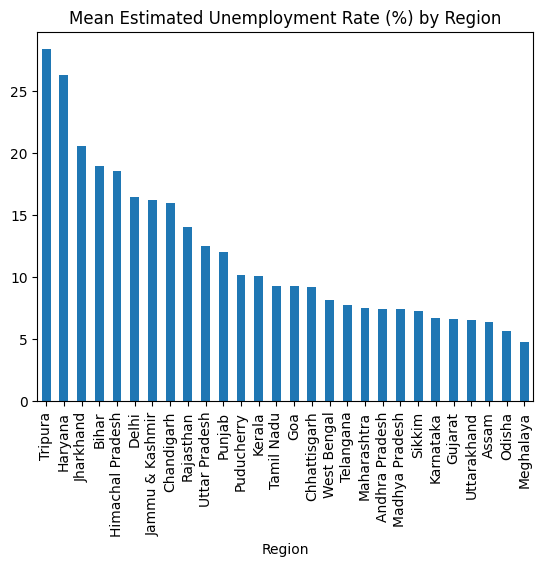

In [ ]:
df_mean_by_region['Estimated Unemployment Rate (%)'].plot(kind='bar',title='Mean Estimated Unemployment Rate (%) by Region',ylabel='')

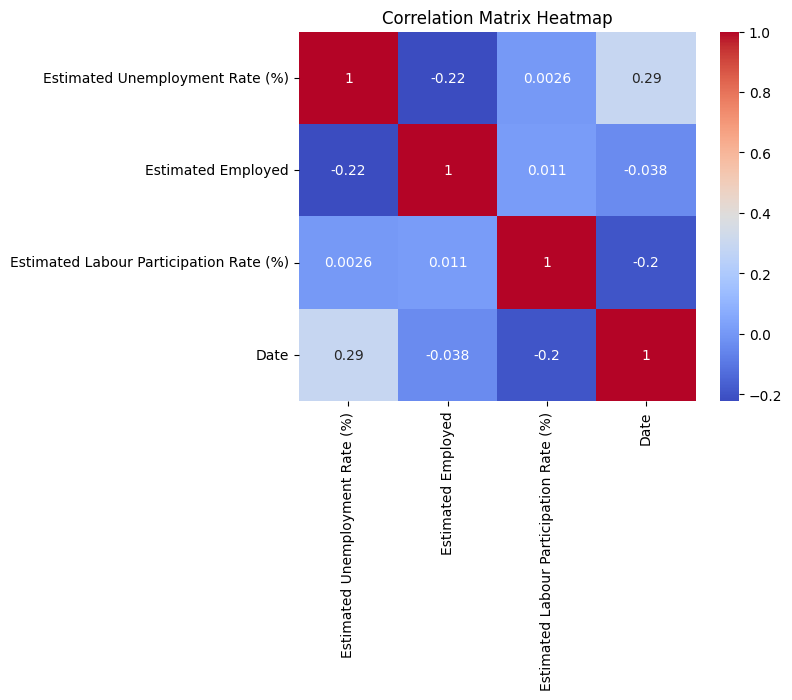

In [ ]:
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)','Date']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_max_unmployment_trend = df[df['Region']==df_mean_by_region[df_mean_by_region['Estimated Unemployment Rate (%)'] == df_mean_by_region['Estimated Unemployment Rate (%)'].max()].index[0]].sort_values(by='Date')

In [ ]:
df_max_unmployment_trend.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
304,Tripura,2019-05-31,Monthly,29.25,1019549.0,64.47,Rural
698,Tripura,2019-05-31,Monthly,34.69,423127.0,69.50,Urban
305,Tripura,2019-06-30,Monthly,26.64,1107013.0,67.40,Rural
699,Tripura,2019-06-30,Monthly,25.59,408738.0,58.80,Urban
306,Tripura,2019-07-31,Monthly,22.47,1052597.0,60.54,Rural


In [ ]:
df_max_unmployment_trend_Rural = df_max_unmployment_trend[df_max_unmployment_trend['Area']=='Rural']
df_max_unmployment_trend_Urban = df_max_unmployment_trend[df_max_unmployment_trend['Area']=='Urban']

In [ ]:
df_mean_by_Date = df.groupby('Date').mean(numeric_only=True)[
    ['Estimated Unemployment Rate (%)', 'Estimated Employed']
]

In [ ]:
df_mean_by_Date

,Estimated Unemployment Rate (%),Estimated Employed
Date,,
2019-05-31,8.874259,7.410148e+06
2019-06-30,9.303333,7.358642e+06
2019-07-31,9.033889,7.404425e+06
2019-08-31,9.637925,7.539815e+06
2019-09-30,9.051731,7.739464e+06
2019-10-31,9.900909,7.298382e+06
2019-11-30,9.868364,7.273661e+06
2019-12-31,9.497358,7.377388e+06
2020-01-31,9.950755,7.677344e+06


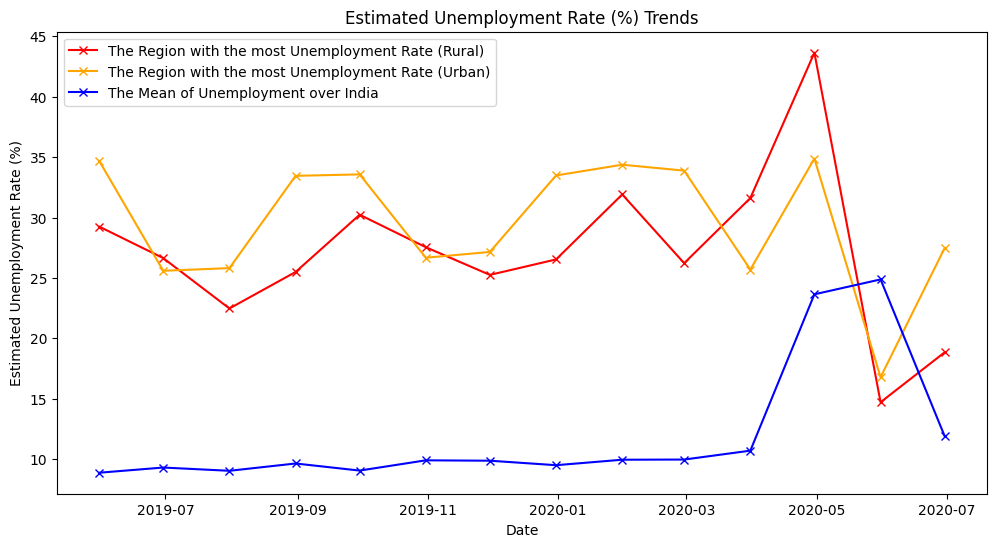

In [ ]:
max_unemployment_rate_region = df_mean_by_region[
    df_mean_by_region['Estimated Unemployment Rate (%)'] == df_mean_by_region['Estimated Unemployment Rate (%)'].max()
].index[0]

plt.figure(figsize=(12, 6))
plt.plot(df_max_unmployment_trend_Rural['Date'], df_max_unmployment_trend_Rural['Estimated Unemployment Rate (%)'], label='The Region with the most Unemployment Rate (Rural)', marker='x', color='red')
plt.plot(df_max_unmployment_trend_Urban['Date'], df_max_unmployment_trend_Urban['Estimated Unemployment Rate (%)'], label='The Region with the most Unemployment Rate (Urban)', marker='x', color='orange')
plt.plot(df_mean_by_Date.index, df_mean_by_Date['Estimated Unemployment Rate (%)'], label='The Mean of Unemployment over India', marker='x', color='blue')
plt.title('Estimated Unemployment Rate (%) Trends')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()

# **During Covid Analysis**

In [ ]:
df_during_pandemic = df[(df['Date'] >= '2020-02-01') & (df['Date'] <= '2022-06-30')]

In [ ]:
df_during_pandemic

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural
13,Andhra Pradesh,2020-06-30,Monthly,0.85,15572975.0,53.76,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
df_during_pandemic.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,257,257.000000,2.570000e+02,257.000000
mean,2020-04-29 08:52:17.743190784,16.163813,6.741328e+06,40.235992
min,2020-02-29 00:00:00,0.000000,4.942000e+04,13.330000
25%,2020-03-31 00:00:00,5.910000,1.276291e+06,36.030000
50%,2020-04-30 00:00:00,12.250000,4.280434e+06,39.060000
75%,2020-05-31 00:00:00,21.230000,1.008303e+07,43.900000
max,2020-06-30 00:00:00,76.740000,4.425743e+07,69.880000
std,NaN,14.193661,7.710383e+06,8.587768


In [ ]:
df_during_pandemic.describe(include='object')

,Region,Frequency,Area
count,257,257,257
unique,28,1,2
top,Andhra Pradesh,Monthly,Urban
freq,10,257,132


In [ ]:
df_during_pandemic_mean_by_region = df_during_pandemic.groupby(['Region','Area']).mean(numeric_only=True)[
    ['Estimated Unemployment Rate (%)', 'Estimated Employed']
].sort_values(by='Estimated Unemployment Rate (%)', ascending=False)
df_during_pandemic_mean_by_region

Estimated Unemployment Rate (%)  Estimated Employed
Region           Area                                                      
Jharkhand        Urban                        37.420000        1.820664e+06
Haryana          Urban                        33.038000        2.190408e+06
                 Rural                        32.502000        4.249867e+06
Puducherry       Urban                        31.738000        1.913558e+05
Bihar            Urban                        27.986000        2.579150e+06
Tripura          Urban                        27.740000        3.876110e+05
Bihar            Rural                        27.568000        1.903085e+07
Tripura          Rural                        27.004000        9.848286e+05
Jharkhand        Rural                        26.484000        5.812088e+06
Puducherry       Rural                        26.186667        1.250717e+05
Himachal Pradesh Urban                        23.452000        1.911926e+05
Delhi            Urban                        22.470000        4.152915e+06
Rajasthan        Urban                        21.896000        4.537489e+06
Tamil Nadu       Urban                        21.240000        8.166434e+06
                 Rural                        20.302000        1.054015e+07
Uttar Pradesh    Urban                        19.204000        1.259146e+07
Delhi            Rural                        18.716000        1.314236e+05
Chhattisgarh     Urban                        17.860000        1.740020e+06
Punjab           Rural                        17.040000        5.239303e+06
Kerala           Rural                        15.902000        3.770342e+06
                 Urban                        15.820000        3.662147e+06
Andhra Pradesh   Urban                        15.722000        4.054080e+06
Jammu & Kashmir  Urban                        15.703333        9.985513e+05
Chandigarh       Urban                        15.106667        3.010770e+05
Madhya Pradesh   Urban                        14.982000        5.564905e+06
Karnataka        Rural                        14.862000        1.219208e+07
Jammu & Kashmir  Rural                        14.605000        2.322746e+06
Telangana        Rural                        14.494000        9.705316e+06
                 Urban                        13.366000        4.379998e+06
Uttar Pradesh    Rural                        12.562000        4.157294e+07
Himachal Pradesh Rural                        12.404000        1.739837e+06
Maharashtra      Rural                        12.238000        2.109276e+07
Sikkim           Urban                        12.150000        7.995400e+04
Rajasthan        Rural                        12.102000        1.496307e+07
Goa              Rural                        11.970000        1.606223e+05
Odisha           Rural                        11.384000        9.418025e+06
West Bengal      Urban                        10.986000        9.861315e+06
Karnataka        Urban                        10.984000        8.605912e+06
Punjab           Urban                        10.836000        2.970081e+06
Gujarat          Urban                        10.706000        8.843310e+06
Meghalaya        Urban                        10.535000        2.271388e+05
Maharashtra      Urban                        10.520000        1.508030e+07
West Bengal      Rural                        10.498000        2.183437e+07
Uttarakhand      Urban                         9.810000        8.737508e+05
Madhya Pradesh   Rural                         9.406000        1.534920e+07
Assam            Urban                         8.576000        1.547457e+06
Gujarat          Rural                         8.444000        1.208186e+07
Andhra Pradesh   Rural                         8.314000        1.139520e+07
Odisha           Urban                         7.766000        2.079165e+06
Goa              Urban                         6.943333        3.008153e+05
Chhattisgarh     Rural                         6.596000        6.302298e

<Axes: title={'center': 'Mean Estimated Unemployment Rate (%) by Region'}, xlabel='Region,Area'>

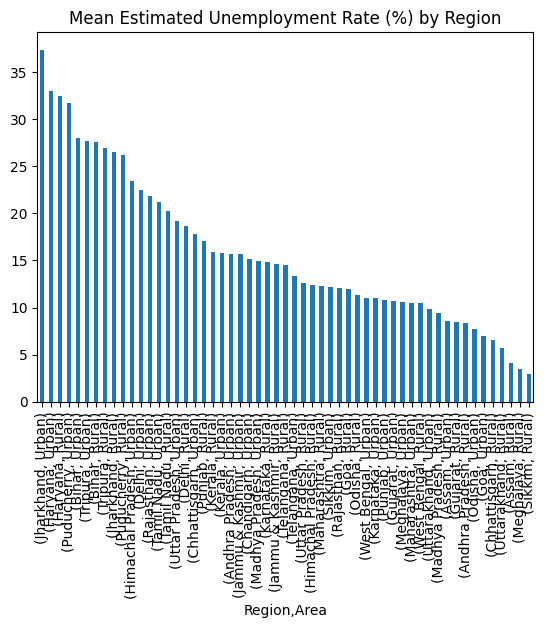

In [ ]:
df_during_pandemic_mean_by_region['Estimated Unemployment Rate (%)'].plot(kind='bar',title='Mean Estimated Unemployment Rate (%) by Region',ylabel='')

<Axes: title={'center': 'Mean Estimated Unemployment Rate (%) by Area'}, xlabel='Area'>

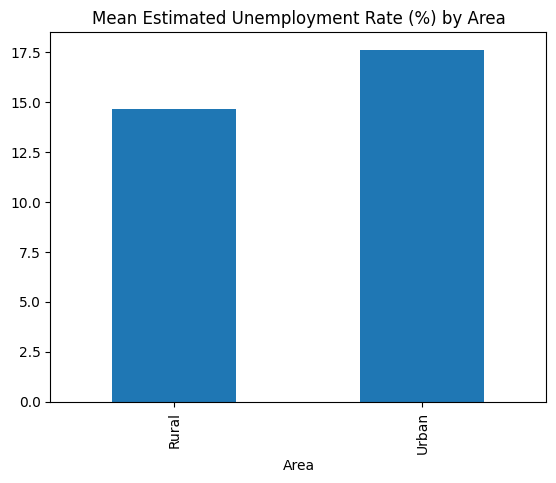

In [ ]:
df_during_pandemic.groupby('Area').mean(numeric_only=True)['Estimated Unemployment Rate (%)'].plot(kind='bar',title='Mean Estimated Unemployment Rate (%) by Area',ylabel='')